# RSA Algorithm 

### Algorithmic Overview:

`The RSA Algorithm is a crypto-algorithm which aims to protect data by encrypting (or "scrambling it").` Relative to other forms of encryption, it is pretty slow and thus is usually used not to exchange data but to encrypt key exchanges that way another (usually a symmetric) encryption algorithm can be used to exchange data.

It works on the "Factoring Problem" principle: With **Classical** Computers, there exists no effiecient integer Factorization Method when integers are "very large."
    

It's name [RSA] comes from the last-names Rivest, Shamir, Adleman, the three men attributed with the algorithms invention (the the patent was given to MIT).


<font size = 1.5> *A side note about RSA, [pending the creation of larger quantum   computers for this to be relevant], Peter Shor's 2003? quantum algorithm has been proven to "break" the algorithm* </font>

<div>
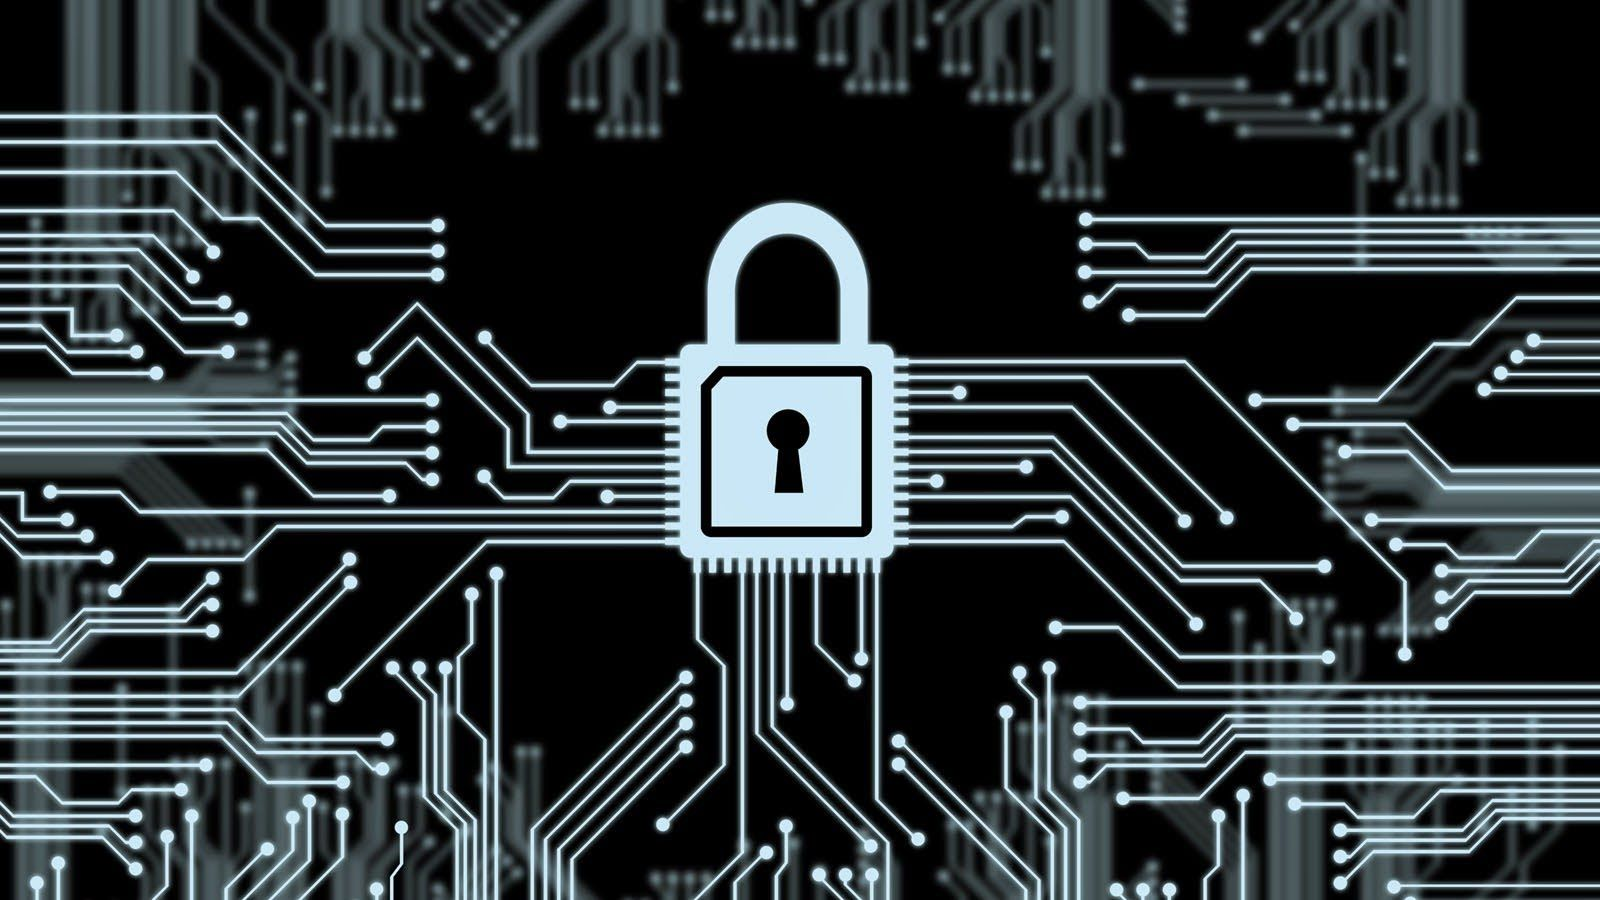
</div>

RSA is an `Asymmetric Encryption Algorithm` or a Private-Public Key Encryption Algorithm. That is to say it uses a different "key" to encrypt than it does to decrypt. 

<font size = 1.5> Note: public key = encryption key; private key = decryption key; In addition to the public/private keys, RSA uses an auxilary value (n)</font>

--------------------


### How Public-private key encryption works:
Given Alice sending a message to Bob, and outsider Eve who wants to intercept/read the messages

Bob has a private key and a public key, he makes the public key available to anyone who wants to send him a message (Alice)

So Alice takes Bob’s public key and encrypts her message with Bob’s public key and then sends it to Bob

Eve intercepts the message and is NOT able to read it because she does not have the required private key to decrypt the message

Bob also receives the message and is able to read and decrypt it as he has his private key (which is kept secret from everyone else)




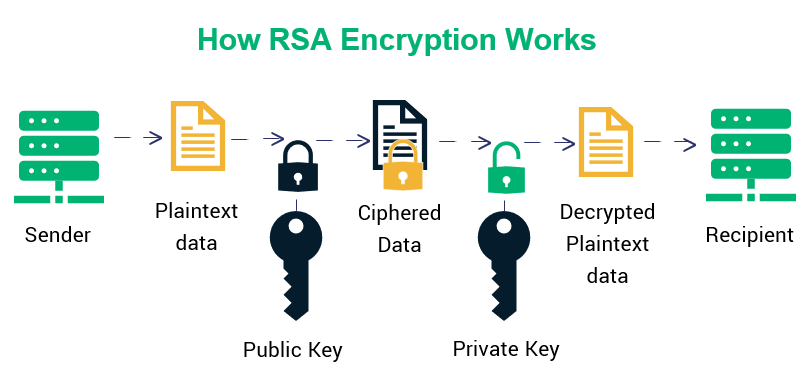


<font size = 1.5 > Example based off of: https://en.wikipedia.org/wiki/RSA_(cryptosystem), <br> Image taken
from Jay Thatcher's blog: https://sectigostore.com/blog/ecdsa-vs-rsa-everything-you-need-to-know/</font>

---------------

### Algorithmic Outline:
1. Key Generation
2. (Implict Key Distribution) <font size = 1> *This would happen in real world applications, but I am not going to touch on it here* </font>
3. Encryption
4. Decryption


The algorithm follows the above outline. Note that I will be calling various methods throughout the algorithm. Those methods will be featured below, each with an accompanying explanation and an occasional example. 

I will also be highlighting two different ways that the keys are generated, but for the main example will be using *Carmicheal's totient* function, scroll further down for a discussion on the differences between Carmicheal's and Euler's totient functions.

------------------------
# The Code

###### Key Generation
1. Arbitrary primes: p,q
2. Modulus n (auxilary value): p*q 
3. Totient (Euler/Carmicheal)
4. Choose Encryption Exponent e: 1 < e < totient (e, totient coprime)
5. Determine Decryption Exponent d: d ≡ e−1 (mod totient)  
<font size = 2> Note e,d are modular multiplicative inverses</font> 


In [10]:
import math
import random

### KEY GENERATION CODE


ARBITRARY PRIMES

In [146]:
# p and q are arbitrary prime numbers that are used as auxilary values to 
# calculate both the private/public keys
p, q = generateRandomPrime(100,200), generateRandomPrime(100,200)

#p,q must be distinct values
while p == q: 
    q = generateRandomPrime(100,200)

print(p,q)

643 709


In [147]:
# Modulus n; used as an auxilary value (the modulo term) for both the
# private and public keys
n = p*q

print(n)

455887


In [148]:
# Totient value; using Carmicheal's Totient Function (lcm optimization)
totient = CarmichealsTotient(p,q)

print(totient)

75756


In [149]:
# Exponent E, Encryption (public key) Exponent
e = choosePublicKeyExponentE(totient)

print(e)

1033


In [150]:
# Exponent D, Decryption (private key) Exponent
d = calculatingPrivateKeyExponentD (totient, e)

print(d)

28381


In [151]:
#Public Key (including aux val n)
publicKey = (n,e)

print("Public Key:", publicKey)

Public Key: (455887, 1033)


In [152]:
#Private Key (including aux val n)
privateKey = (n,d)

print("Private Key:", privateKey)

Private Key: (455887, 28381)


#### Message Prompting

In [156]:
#plaintext M = user input
M = input("What message would you like to encrypt? ")

What message would you like to encrypt? Super secret message secret fbi cia m15


### Encryption
Cipher-Text Computation: `C = M^e (mod n)`


In [157]:
# Ciphertext C = encrypted plaintext M
C = encrypt(M, publicKey)

print(C)

[191443, 330384, 264708, 359619, 259996, 277767, 404181, 359619, 50201, 259996, 359619, 145613, 277767, 81183, 359619, 404181, 404181, 228081, 152439, 359619, 277767, 404181, 359619, 50201, 259996, 359619, 145613, 277767, 119157, 138934, 274729, 277767, 50201, 274729, 228081, 277767, 81183, 120352, 164910]


### Decryption
Plain-Text Computation: `M = C^d (mod n)`

Note that C<sup>d </sup> = m<sup>ed </sup> (mod n)

(raising m<sup>e</sup> by its modular multiplicative inverse essentially “cancles out” the encryption operation


In [158]:
# Plaintext M = decrypted ciphertext C
M = decrypt(C, privateKey)

print(M)

Super secret message secret fbi cia m15


------------------------------
# Methods and More Specific Explanations

## Primality Test Explanation and Code

Three Initial Optimizations
    __n <= 3__
        - serves to weed out negative numbers
        - 0, 1, 2, and 3 as they are kinda "funky" and do not always hold to the
        general rules
        - The above numbers are also small enough where it is easy to take this liberty

  __if  n mod 2 == 0__
        - checks if the number is even
        - and if it is even that it is pretty obviously not prime

    if n mod 3 == 0
        - checks if the number is divisible by 3 and so such not prime

The While Loop
- Prime numbers take the form 6k+-1
- When checking if a number N is prime it is only necceasry to check the PRIME numbers
less than sqrt(N) --> (as all other numbers will contain the above primes)


__i = 5__ <-- the first instance of 6k-1

__while  i <= rad(n)__ <-- breaks if all possible primes have been checked or if i > rad(n)

__if n mod i == 0 or n mod i+2 == 0__ <-- checks if n is divisible by potential primes 6k+1 (as i takes the form 6k-1 and i+2 takes the form 6k+1) --> if it is divisibly it is clearly not prime
    

<p style="margin-left: 40px "> <b> return false </b> </p>
 


__i += 6__ <-- brings i to the next iteration of 6k-1


In [36]:
def primalityTest(n):
    if n <= 3: #checks small numbers (easily done as only 2 and 3 are Prime)
        return n>1

    if n % 2 == 0 or n % 3 == 0: #optimization to check if divisible by 2 or 3
        return False

    i = 5 #helper integer taking the form 6k-1

    radN = math.sqrt(n) #last val that needs to b cross-refrenced
    while i <= radN: 

        if n % i == 0 or n % (i+2) == 0: #check n against all forms of 6k+-1 
            return False                                # Note that i+2 = 6k+1

        i += 6 #move i to the next iteration of 6k-1

    return True

## Prime Generator Explanation and Code

Primes take the form: 6k +-1  (but not all numbers that take this form are prime)

[ For the ease of calculation I'm only going to be looking at 6k + 1 ]


This method will randomly generate an integer value k. It will then form a "potential-prime number" 6k+1, and will lastly use the primality test method to see if the number is genuinely prime. Until the number is prime, a new k value will be generated. And when there is a prime number it will be returned

In [37]:
#primes take the form 6k+1 (so for their to be a higher likelyhood 
#on random r being a prime -- the nums will be randomly generated to take that form)

def generateRandomPrime(lowerBound, upperBound):

    while True: 
        k = random.randint(lowerBound, upperBound)
        rPrime = 6*k+1

        if primalityTest(rPrime):
            return rPrime

## Totient Functions 




### Euler's Totient Function

Sometimes refered to as the function phi

phi(n), counts all the numbers (1-n) that are relatively prime to some number n 

It's important to note that phi(p) where p is some prime number is just equal to p-1
(bc a prime number is relatively prime to all numbers less than itself): `phi(p) = p - 1`

ALSO: Euler's totient function is multiplicative function so `phi(mn) = phi(m)*phi(n)`

In [42]:
# This function returns phi(n), where n = p*q; since p and q are prime and since phi is a
# multiplicative function; phi(n) = phi(p)*phi(q) = (p - 1)(q - 1)

def EulersTotient(p,q):
    return (p-1)(q-1)

### Carmicheal's Totient Function

Sometimes refered to as the function lambda

Carmicheal's totient function is considered to be an optimization of Euler's function; it is sometimes referred to as the reduced totient function or the least universal exponent function 


Generally (in math theory) the function, `Lambda(n)` aims to: 
    
- Find the number “a” that when any number coprime to a given number n is raised to the a power mod n is equal to 1
- Ie: for coprime m, m < n → m1^a mod n = 1, m2^a mod n = 1, etc etc
- Numerical: 1^2 mod 8 = 1,  3^2 mod 8 = 1, 5^2 mod 8 = 1, 7^2 mod 8 = 1


In relation to Eulers (phi) function:
lambda(n) = lambda(pq) = lcm (phi(p), phi(q) ) = `lcm(p-1, q-1)`


Note: that we can use the Euclidean Algorithm (gcd function) to get the lcm
- `lcm(a,b) = abs(ab)/gcd(a,b)`



In [53]:
# (For RSA), serves as an optimization to Euler's totient function as it essentially
# "reduces" the totient (while maintaining its modular properties)making it a smaller 
# number and thus making operations quicker

def CarmichealsTotient(p,q):
    return  int((abs( (p-1)*(q-1) ) )/ (euclideanAlgorithm(p-1,q-1) ))

### Euclidean Algorithm (GCD Function)
Finds the greatest common demonitator of two numbers

__Mathematical background__

Numbers can be expressed in the form: `a = bq + r` -- (a multiplication + the remainder)
- Ex: 47 = 23*2 + 1 or 98 = 32*3 + 2 or 10 = 6*1 + 4

A property of the greatest common denominator (gcd) of a number is that when it is expressed in the  a = bq +r form
- `gcd(a,b) = gcd(b,r)`

Another property of gcd is that:
- `gcd(0,n) = n`

The Euclidean Algorithm uses those two properties in order to effectively find the gcd of two numbers

-------------------------
__Algorithm Overview__

That is to say if I want to find the gcd of two numbers; ex (114 and 96)
 
In order to solve gcd (114, 96)
- I want to express 114 in the a = bq + r form in a way that is relevant to the above problem
- `114/96 = 1, Remainder: 18` 

The above division can be rearranged into: 114 = 96*1 + 18
- With 114 = a, 96 = b, 1 = q, 18 = r
- With that reasoning, `gcd(114, 96) = gcd(96, 18)`

The above steps are to be continually repeated until you wind up w/ the form: gcd(0,n) in which case n is the gcd of the original problem

-------------------------
__Numeric Example__

gcd(114, 96)
- 114//96 =1, r = 114 - 96*1 = 18
- `114 = 96*1 + 18`

gcd(96, 18)
- 96//18 = 5, r = 96 - 18*5 = 6
- `96 = 18*5 + 6`

gcd(18,6)
- 18//6 = 3, r = 18 - 6*3 = 0
- `18 = 6*3 + 0`
gcd(6,0)


In [57]:
# GCD Function
def euclideanAlgorithm(b,r):

    if r == 0: #gcd(n,0) = n
        return b

    b, r =  r, b%r #gcd(a,b) = gcd(b,r) = gcd(b, a mod b)
    
    return euclideanAlgorithm(b,r) #recursion (repeat)

## Key Pair Generation (exponents e, d)


__Choosing Public Encryption Exponent E:__

Exponent e is used to `encrypt` the message that is going to be sent.

Note that in this implementation of RSA, I will be chosing exponent e; and later calculating/deriving exponent d. But it is 100% possible to do the opposite and chose exponent d and find exponent e


E must be chose according to the following conditions: 
- `1 < e < totient`; additionally e must be `co-prime` to the totient value

For the ease of calculation; in order to find a workable "e-val"; it is possible to randomly generate a prime number and the determine whether or not it divides the totient (if should generate a random prime until it does not)

Why does that work?
- Bc a prime number is coprime to every number that it is not a factor of (that it does not divide)


In [55]:
#to make calculation ezier going to make e prime - and then ensure its not a factor of the totient

def choosePublicKeyExponentE (totient):

    while True:
        rPrime = generateRandomPrime(100,200)

        if totient % rPrime != 0:
            return rPrime

__Calculating Private Decryption Exponent D:__

Exponet d is used to `decrypt` the message that has been sent

Exponent d is considered to be the `Modular Multiplicative Inverse` of Exponent E (an important part of what makes the encryption/decryption process possible) 
- `d as d ≡ e−1 (mod λ(n))`

The Modular Multiplicative Inverse can be found by using the `Extended Euclidean Algorithm`
 
<font size = 1> Note: There is another way to find exponent d, by use of Eulers Theorem; but I am not going to do it that way </font>

In [58]:
def calculatingPrivateKeyExponentD (totient, e):
        d = modularMultiplicativeInverse(e, totient)
        return int(d)

### Extended Euclidean Algorithm

The Extended Euclidean Algorithm, in addition to returning the GCD of two numbers (a,b), returns the coefficient's of Bezout's identity

Bezouts' Identity: ax + by = gcd(a,b)

When a and b are coprime, gcd = 1, and the `Modular Multiplicative Inverse` can be found; __x__ is the Modular Multiplicative Inverse of __a mod b__; and y is the Modular Multiplicative Invese of b mod a

ie: ax + by = 1

In [62]:
#In relations to RSA, a = exponent e, b = totient value
# the gcd (or g) should always be 1 because (e, totient) are coprime by design
# as such there should always be a mod. multiplicate inverse
#(which is the private key exponent d)


#return (g,x,y) such that a*x + b*y = gcd(a,b)
# NB: g stands for gcd
def extendedEuclideanAlgorithm(a,b):
    if a == 0: #gcd(n,0) = n
        return (b,0,1) #this will only happen if the numbers ARE NOT COPRIME 
                        #(which by design shld not be the case)


    g,y,x = extendedEuclideanAlgorithm(b%a, a) #returning the coefficients for Bezout's identity
    return (g, x - (b//a)*y, y)

#return x such that (x*a) % b ==1 
def modularMultiplicativeInverse(a,m):
    g, x, y = extendedEuclideanAlgorithm(a,m)

    if g != 1:
        raise Exception ("Modular inverse does not exist")

    return x % m

## Encryption / Decryption

Modular Properties Foremention:
- Note that the operation: k^a = k^b (mod n) is generally FALSE
- Now `that's kinda odd` cuz that is the very encryption/decryption operation that RSA works on…

Here's why RSA works:
- if a = b (mod totient(n))
- k^a = k^b (mod n)
- `BASICALLY, a and b are modular multiplicative inverses`


W/ the Mod. Mult. Inverse these processes are reversible:
- m**e = c (mod n) <font size = 1> encryption </font>
- c**d = m (mod n) <font size = 1> decryption </font>


`c^d = m^e^d (mod n)`






In [82]:
# plaintext M, publicKey (n, e)
def encrypt(M, publicKey):
    n, e = publicKey
    
    return [(ord(char)**e)% n for char in M]

In [81]:
# ciphertext C, privateKey (n, d)
def decrypt(C, privateKey):
    n, d = privateKey
    M = [chr((char**d)%n) for char in C]
    
    return ''.join(M)

# Discussion on the Mathematical Proofs

## Fermat's Little Theorem

Fermat’s Little Theorem: states that for prime number p and integer a, __a <sup>(p-1)</sup> ≡ 1 (mod p)__

RSA works on: __(m<sup>e </sup>)<sup>d</sup> ≡ m (mod pq)__, for every integer m when p and q are distinct primes, e and d are positive integers where ed ≡ 1 (mod λ(pq)) (ie: modular multiplicative inverses)

Note that λ(pq)  = lcm(p-1, q-1), which means that by construction  `λ(pq) is divisible by both p-1, and q-1`

Therefore it can be said that ed ≡ 1 (mod λ(pq))  → `ed -1 = h(p-1) = k(q-1)`, where h, k are non-negative integers


To verify that (m<sup>e</sup>)<sup>d</sup> and m are congruent mod pq, you can check to see if the are congruent mod p and mod q separately (Chinese Remainder Thm)

Proving (m<sup>e</sup>)<sup>d</sup>,  m are congruent (mod p)
1. If m = 0 (mod p), m is a multiple of p. Thus med is a multiple of p. So med = 0 = m (mod p)
2. If m ≠ 0 (mod p); m<sup>ed</sup> = m<sup>(ed -1)</sup> m = m<sup>h(p-1)</sup> m ≡ 1<sup>k</sup>(m) ≡ m (mod)

`We used Fermat’s Little Theorem to replace mp -1 (mod p) with 1 `

The same process done to prove (m<sup>e</sup>)<sup>d</sup>,  m are congruent (mod p) is done to prove (m<sup>e</sup>)<sup>d</sup>,  m are congruent (mod q) → as they are both prime numbers with the same relationship to ed -1


## Euler's Theorem

The original paper Rivest, Shamir, and Adlement used to prove why RSA works used Fermat’s little theorem, but it is fairly common to find proofs that used Euler’s theorem instead.

To prove that RSA functions, we must prove that med ≡ m (mod n), where n = pq and p,q are distinct primes, and e,d are positive integers that satisfy ed ≡ 1 (mod φ(n)) (modular multiplicative inverses)

`ed ≡ 1 (mod φ(n))` can be rewritten as `ed = 1  + hφ(n)`, where h is a non-negative integer 

Assuming that m is relatively prime to n;

__m^ed = m^(1 + φ(n)) = (m)m <sup> <b> φ(n)* h </b></sup> ≡ m (1^h) ≡ m (mod n)__

Note: that the second congruence follows from Euler’s theorem

(Addiontally for any e and where ed ≡ 1 (mod λ(n)), `the same conclusion is reached` from Carmicheals’ generalization of Euler’s theorem, which states that  m <sup>λ(n)</sup> ≡ 1 (mod n) for all m relatively prime to n. )

When m is not relatively prime to n, (the above proof does not hold), however not only is this highly unlikely (only 1/p + 1/q − 1/(pq)  numbers have this property), but it `does not matter` as the “desired congruence” still holds true. This can be show by m ≡ 0 (mod p) or m ≡ 0 (mod q), as done in the proof utilizing Fermat’s little theorem. 
